# SuperPoint Network Library

In [1]:
%matplotlib inline
import cv2
import numpy as np
import torch

import matplotlib.pyplot as plt

## Load Test Image

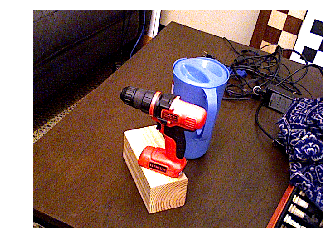

In [2]:
img = cv2.cvtColor(cv2.imread('test.png'), cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.axis('off')
plt.show()

## Standard SuperPoint Network

In [3]:
import superpoint

frontend = superpoint.SuperPointFrontend()

img_grey = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY).astype(np.float32)/255.
sparce_kps, sparce_desc, heatmap = frontend.run(img_grey)

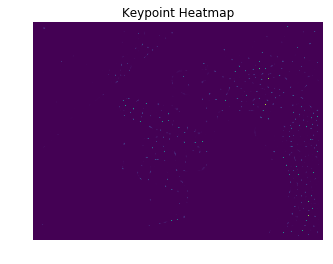

In [4]:
plt.imshow(heatmap)
plt.title('Keypoint Heatmap')
plt.axis('off')
plt.show()

## Dense SuperPoint Network

In [5]:
from superpoint.dense import SuperPoint

superpoint_dense = SuperPoint()

H, W = img_grey.shape[0], img_grey.shape[1]
X = torch.autograd.Variable(torch.from_numpy(img_grey)).view(1, 1, H, W).cuda()
# Descriptor at every pixel
dense_desc = superpoint_dense(X)

# Descriptor at selected keypoints
kps = torch.from_numpy(sparce_kps[:2].T).float()
kp_desc = superpoint_dense(X, kps)

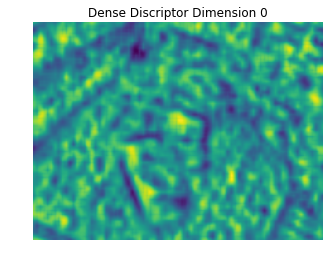

In [6]:
dim = 0
plt.imshow(dense_desc[0,dim].cpu().detach().numpy())
plt.title('Dense Discriptor Dimension {:d}'.format(dim))
plt.axis('off')
plt.show()

## Comparison (Slight diffence in dense due to interpolation)

In [7]:
idx = 0
kp = sparce_kps[:2,idx].astype(int)

print('Standard: ', sparce_desc[:5, idx])
print('Dense KP: ', kp_desc[idx, :5].cpu().detach().numpy())
print('Dense:    ', dense_desc[0,:5,kp[1],kp[0]].cpu().detach().numpy())

Standard:  [-0.02594588 -0.01529458  0.08114805  0.00508752 -0.01609326]
Dense KP:  [-0.02594589 -0.01529459  0.08114805  0.00508752 -0.01609326]
Dense:     [-0.02594589 -0.01529457  0.08114807  0.00508747 -0.01609333]
